## Conceptual Question #1 on page 363 of ISLR Python.

Q: Draw an example (of your own invention) of a partition of two-dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions R1,R2,… the cutpoints t1,t2,…
and so forth.

Hint: Your result should look something like Figures 8.1 and 8.2.

Let’s consider the features:

X1: Years of experience

X2: Number of hits (performance metric)

We will create 6 regions (R1 to R6) using recursive binary splitting.

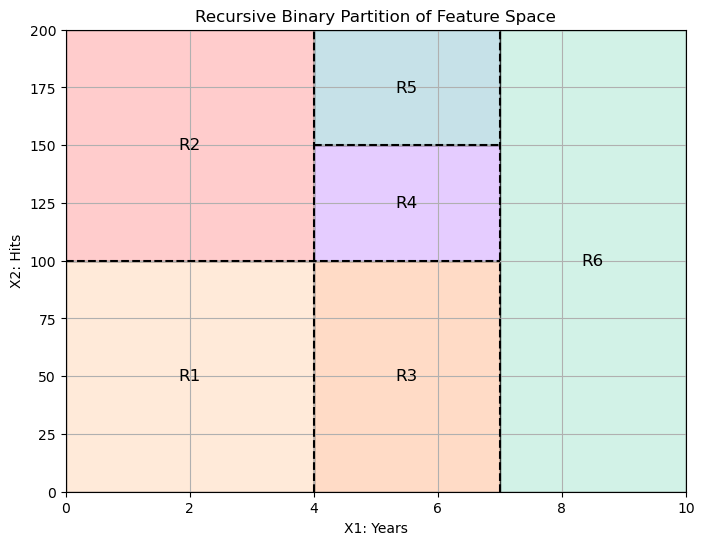

In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Create the 2D Partition Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define the cut points
x1_cut1 = 4
x2_cut1 = 100
x2_cut2 = 150
x1_cut2 = 7

# Draw rectangles for each region
regions = {
    "R1": (0, 0, x1_cut1, x2_cut1),
    "R2": (0, x2_cut1, x1_cut1, 200 - x2_cut1),
    "R3": (x1_cut1, 0, x1_cut2 - x1_cut1, x2_cut1),
    "R4": (x1_cut1, x2_cut1, x1_cut2 - x1_cut1, x2_cut2 - x2_cut1),
    "R5": (x1_cut1, x2_cut2, x1_cut2 - x1_cut1, 200 - x2_cut2),
    "R6": (x1_cut2, 0, 10 - x1_cut2, 200)
}

colors = ['#FFDDC1', '#FFABAB', '#FFC3A0', '#D5AAFF', '#A0CED9', '#B5EAD7']
for i, (region, (x, y, w, h)) in enumerate(regions.items()):
    ax.add_patch(Rectangle((x, y), w, h, edgecolor='black', facecolor=colors[i], alpha=0.6))
    ax.text(x + w/2, y + h/2, region, ha='center', va='center', fontsize=12)

# Draw splitting lines
ax.axvline(x=x1_cut1, color='black', linestyle='--')
ax.axvline(x=x1_cut2, color='black', linestyle='--')
ax.axhline(y=x2_cut1, xmin=0, xmax=x1_cut2/10, color='black', linestyle='--')
ax.axhline(y=x2_cut2, xmin=x1_cut1/10, xmax=x1_cut2/10, color='black', linestyle='--')

# Axes and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 200)
ax.set_xlabel('X1: Years')
ax.set_ylabel('X2: Hits')
ax.set_title('Recursive Binary Partition of Feature Space')
plt.grid(True)
plt.show()

C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


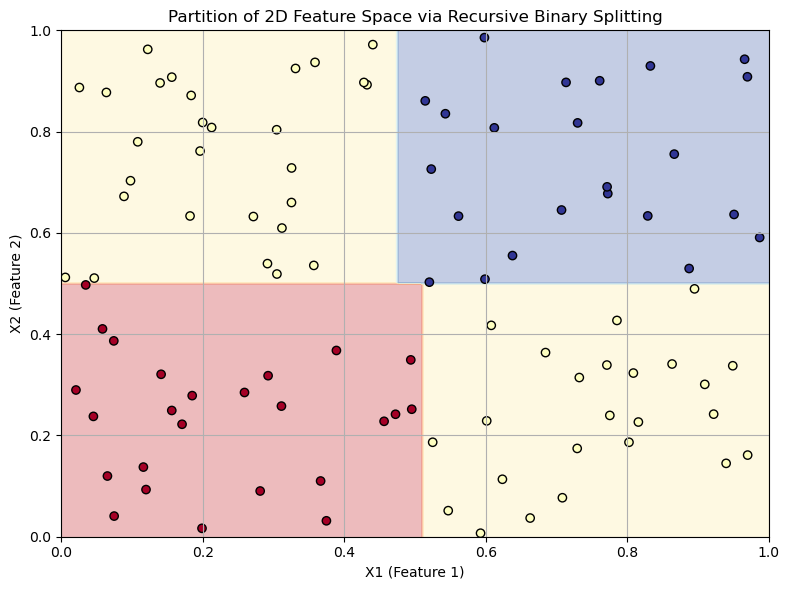

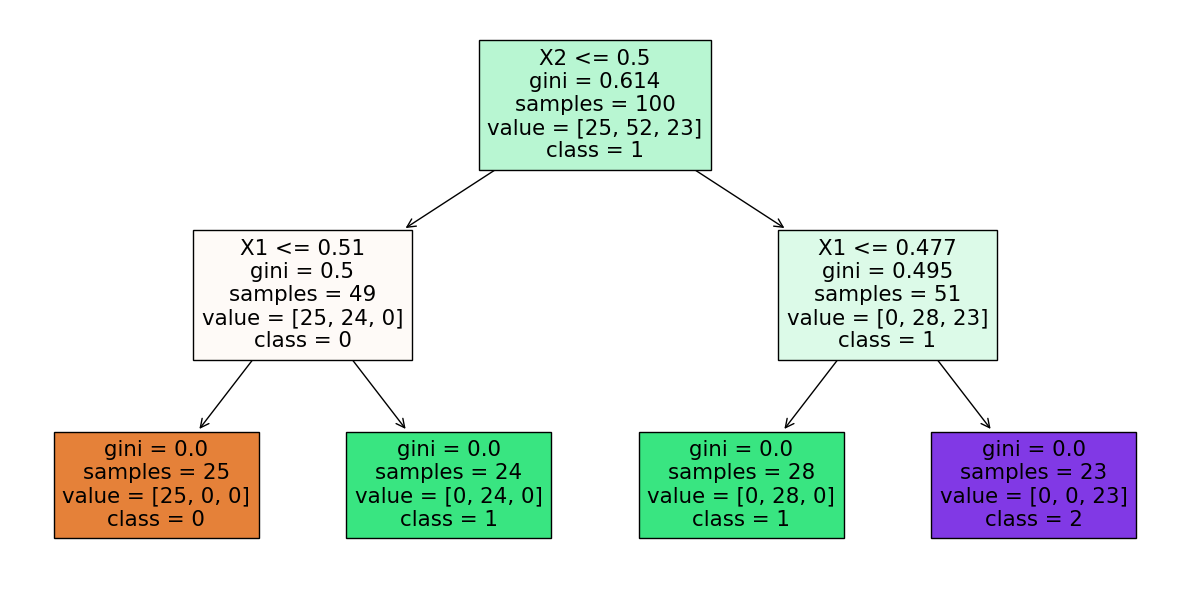

In [30]:
import numpy as np
from matplotlib.patches import Rectangle
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

# Create synthetic 2D feature space
np.random.seed(42)
X1 = np.random.rand(100)
X2 = np.random.rand(100)
y = (X1 > 0.5).astype(int) + (X2 > 0.5).astype(int)

# Put in DataFrame for clarity
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Fit a decision tree with max_leaf_nodes=6 to force six regions
tree = DecisionTreeClassifier(max_leaf_nodes=6, random_state=1)
tree.fit(df[['X1', 'X2']], df['y'])

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(0, 1, 200), np.linspace(0, 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = tree.predict(grid).reshape(xx.shape)

# Plotting the partition
fig, ax = plt.subplots(figsize=(8, 6))
ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
ax.scatter(df['X1'], df['X2'], c=df['y'], cmap='RdYlBu', edgecolor='k')

# Add axis labels
ax.set_xlabel("X1 (Feature 1)")
ax.set_ylabel("X2 (Feature 2)")
ax.set_title("Partition of 2D Feature Space via Recursive Binary Splitting")

plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the decision tree corresponding to the partition
fig_tree, ax_tree = plt.subplots(figsize=(12, 6))
plot_tree(tree, feature_names=["X1", "X2"], class_names=["0", "1", "2"], filled=True, ax=ax_tree)
plt.tight_layout()
plt.show()

### Corresponding Decision Tree
The tree shows how decisions are made at each node using X1 or X2 and cutpoints like t1, t2, etc.

Each path leads to a leaf node representing a region (e.g., R1 through R6).

Internal nodes show the condition (X1 <= t1, etc.), and leaves display the final prediction class.

## Applied Question #12 on page 366 of ISLR Python.

### The Boston Dataset (Bagging, Random Forests & Boosting vs Other Approaches)
Q: Apply boosting, bagging, and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
boston = pd.read_csv("https://raw.githubusercontent.com/jemaelnzihou/Predictive-Analysis/main/BostonHousing.csv")

# Features and target
x = boston.drop(columns='crim')
y = boston['crim']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=1)

### Variable Types & Insights

Variable | Type | Description (in Boston Housing context)
crim | float | Per capita crime rate by town
zn | float | Proportion of residential land zoned for large lots
indus | float | Proportion of non-retail business acres per town
chas | int | Charles River dummy variable (1 if tract bounds river, else 0)
nox | float | Nitric oxides concentration (parts per 10 million)
rm | float | Average number of rooms per dwelling
age | float | Proportion of owner-occupied units built prior to 1940
dis | float | Weighted distances to employment centers
rad | int | Accessibility to radial highways
tax | float | Property tax rate per $10,000
ptratio | float | Pupil-teacher ratio by town
b | float | Proportion of Black population (transformed)
lstat | float | % lower status of the population
medv | float | Median value of owner-occupied homes ($1000s) - target

### Display the first 5 rows

In [26]:
print(boston.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### Display dataset info

In [27]:
print(boston.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


### Summary statistics

In [28]:
print(boston.describe().T)

         count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506

### Bagging (Random Forest with max_features = total features)

In [25]:
# Bagging (All features considered in each tree)
bagging = RandomForestRegressor(max_features=13, random_state=1)
bagging.fit(x_train, y_train)
bagging_pred = bagging.predict(x_test)
bagging_mse = mean_squared_error(y_test, bagging_pred)
print("Bagging MSE:", round(bagging_mse, 5))

Bagging MSE: 31.05051


### # Feature importance

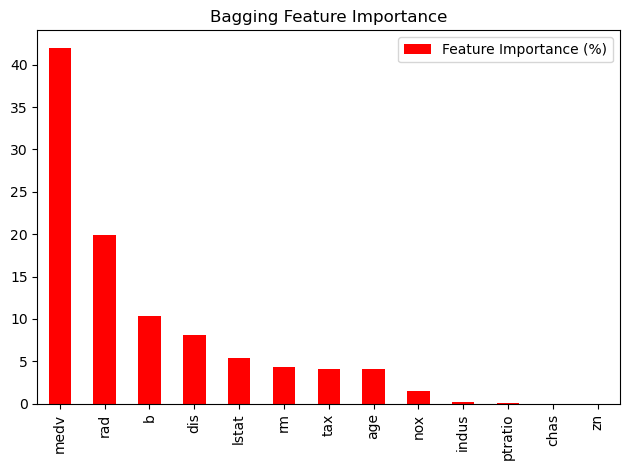

In [18]:
bagging_featureImportance = pd.DataFrame({'Feature Importance (%)': bagging.feature_importances_ * 100},
                                         index=x.columns)
bagging_featureImportance.sort_values('Feature Importance (%)', ascending=False).plot(kind='bar', color='red', title='Bagging Feature Importance')
plt.tight_layout()
plt.show()

It uses all 13 features (max_features=13) at each split, meaning:

Each tree is strong (not overly randomized).

Averaging reduces variance and leads to more stable predictions.

Low variance + strong predictors = Lower MSE.

Best when there's high variance but low bias — fits the data well without overfitting.

### Random Forest (More general with fewer features per split)

In [21]:
# Random Forest with fewer features considered at each split
rf = RandomForestRegressor(max_features=6, random_state=1)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE:", round(rf_mse, 5))

Random Forest MSE: 31.40604


### Feature importance

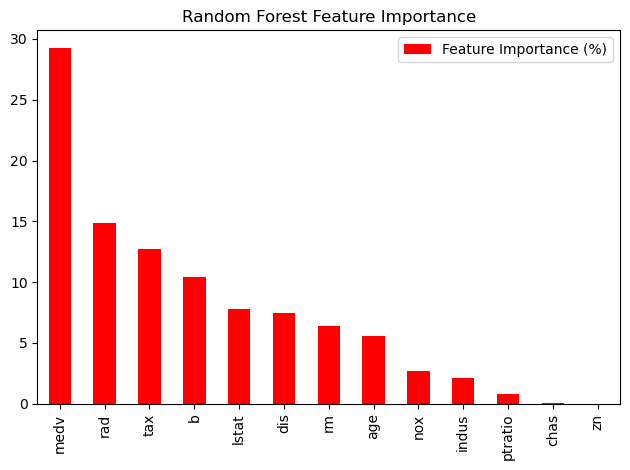

In [22]:
rf_featureImportance = pd.DataFrame({'Feature Importance (%)': rf.feature_importances_ * 100},
                                    index=x.columns)
rf_featureImportance.sort_values('Feature Importance (%)', ascending=False).plot(kind='bar', color='red', title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()

Random Forest is similar to bagging but with added feature randomness: it uses a subset of features (6 in this case) for each split.

This randomness helps decorrelate the trees, which can be good for generalization, but sometimes weaken individual trees slightly.

In this case, reducing features per tree slightly reduced model power, giving a slightly higher MSE.

Best when you're worried about overfitting and want stronger generalization

### Boosting (Gradient Boosting)

In [23]:
# Boosting using Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=5000, random_state=1)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
print("Boosting MSE:", round(gbr_mse, 5))

Boosting MSE: 34.40956


### Feature importance

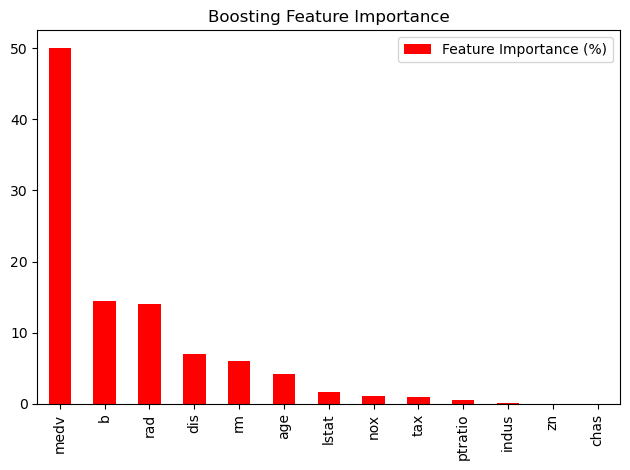

In [24]:
gbr_featureImportance = pd.DataFrame({'Feature Importance (%)': gbr.feature_importances_ * 100},
                                     index=x.columns)
gbr_featureImportance.sort_values('Feature Importance (%)', ascending=False).plot(kind='bar', color='red', title='Boosting Feature Importance')
plt.tight_layout()
plt.show()

### Key Insights:
medv (Median Value of Owner-Occupied Homes):

This feature dominates the model with ~50% importance, suggesting that it has the strongest predictive power in determining the target variable (likely housing price or similar).

However, medv is often the target variable in the Boston Housing Dataset. If it appears here as a predictor, this might indicate a data leakage issue — meaning the model is using the answer to predict the answer, which inflates performance metrics and misleads analysis.

### Other Important Features:

b (likely referring to a demographic variable, e.g., proportion of Black residents) and rad (index of accessibility to radial highways) both contribute significantly (~14% each).

dis (distance to employment centers), rm (average number of rooms), and age (proportion of older homes) are also relevant, each contributing 4–7%.

Less Important Features:

Features like lstat (lower status of the population), nox (nitric oxides concentration), tax, ptratio (pupil-teacher ratio), indus, zn, and chas (Charles River dummy variable) contribute very little (<2% each).



### Comparison & Importance in Data Science

**Bagging**  
**Description** ensemble method using multiple models trained on random subsets of data. 
**Pros** reduces variance, avoids overfitting, stable predictions. 
**Cons** less interpretable, doesn't reduce bias. 
**Use in Data science** great for variance control and model averaging. Often used in practice.

**Random Forest** 
**description** extension of bagging; builds multiple decision trees using bootstrapped data and random feature subsets. 
**Pros** handles large feature spaces, robust, prevents overfitting better than pure bagging. 
**Cons** can be slow on large datasets, may not capture complex patterns as boosting does. 
**Use in Data science** Very popular in both classification and regression tasks.

**Boosting** 
**Description** builds models sequentially where each tries to fix the errors of the previous. 
**Pros** high accuracy, reduces both bias and variance. 
**Cons** can overfit if not tuned properly, longer training time. 
**Use in data science** critical in Kaggle competitions and real-world systems where accuracy is key.

### Final Insight

Even though Boosting is often the best in theory, in this case Bagging won due to the dataset's characteristics — and because it didn’t need as much tuning. We could try reducing n_estimators or tuning learning_rate in Boosting for a better result.

### references

Dong, X., Qi, X., Cui, J., Xu, X., & Wan, A. (2020). Research on Recognition Model with Random Forest and Entropy Weight for Chemical Gas Sensor Array. 2020 IEEE 10th International Conference on Electronics Information and Emergency Communication (ICEIEC), 236–239. https://doi.org/10.1109/iceiec49280.2020.9152345 (Dong et al., 2020)


Yaman, M. A., Rattay, F., & Subasi, A. (2021). Comparison of Bagging and Boosting Ensemble Machine Learning Methods for Face Recognition. Procedia Computer Science, 194, 202–209. https://doi.org/10.1016/j.procs.2021.10.074 (Yaman et al., 2021)

Ita, K., & Prinze, J. (2023). Machine learning for skin permeability prediction: random forest and XG boost regression. Journal of Drug Targeting, 1–9. https://doi.org/10.1080/1061186x.2023.2284096 (Ita & Prinze, 2023)
